# [NY Citi Bike](https://citibikenyc.com/) Data Analysis: Cluster Analysis
Script by Ryan Lee

## Table of Contents

### 1. [Import libraries](#Import_libraries)

### 2. [Import data](#Import_data)

### 3. [Data preparation](#Data_preparation)

- [Standardize data](#standardize)

### 4. [The elbow technique](#Elbow_technique)

### 5. [k-means clustering](#Clustering)

- [Scatterplots](#scatterplots)
- [Conclusion](#conclusion)

### 6. [Descriptive statistics](#Descriptive_statistics)

- [Conclusion](#conclusion2)

### 7. [Export data](#Export_data)

<a id='Import_libraries'></a>
# 1. Import libraries

In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
# This command prompts matplotlib visuals to appear in the notebook without the need to "call" them specifically.

%matplotlib inline

<a id='Import_data'></a>
# 2. Import data

In [3]:
# Create a string of the path for the main project folder

path = r'C:\Users\Ryan\Documents\08-31-2023 Citi Bike Analysis'

In [4]:
# Import the “201903-citibike-tripdata-cleaned.pkl” data set using the os library

df_citibike = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', '201903-citibike-tripdata-cleaned.pkl'))

In [5]:
# Check the output

df_citibike.head()

,user_type,gender,age,age_group,trip_duration,start_day_name,start_day,start_hour,start_station,start_latitude,start_longitude,end_station,end_latitude,end_longitude,borough
0,Subscriber,Male,30,26-35,24.379999,Friday,1,0,Fulton St & Broadway,40.711067,-74.009445,Greenwich St & W Houston St,40.728848,-74.008591,Manhattan
1,Subscriber,Male,39,36-45,4.750000,Friday,1,0,E 4 St & 2 Ave,40.726280,-73.989777,E 2 St & Avenue C,40.720875,-73.980858,Manhattan
2,Subscriber,Male,32,26-35,11.430000,Friday,1,0,E 33 St & 5 Ave,40.747658,-73.984909,6 Ave & Spring St,40.725254,-74.004120,Manhattan
3,Subscriber,Female,32,26-35,7.370000,Friday,1,0,6 Ave & Spring St,40.725254,-74.004120,Bayard St & Baxter St,40.716022,-73.999741,Manhattan
4,Subscriber,Male,28,26-35,48.549999,Friday,1,0,W 31 St & 7 Ave,40.749157,-73.991600,W 16 St & The High Line,40.743351,-74.006821,Manhattan


<a id='Data_preparation'></a>
# 3. Data preparation

In [6]:
# Create a subset

df = df_citibike[['age', 'trip_duration', 'start_hour']]

In [7]:
# Check the output

df.head()

,age,trip_duration,start_hour
0,30,24.379999,0
1,39,4.750000,0
2,32,11.430000,0
3,32,7.370000,0
4,28,48.549999,0


<a id='standardize'></a>
## Standardize data

In [8]:
# Define standard scaler

scaler = StandardScaler()

In [9]:
# Transform data

df_transform = scaler.fit_transform(df)

In [10]:
# Check the output

df_transform

array([[-0.7486796 ,  0.08615369, -2.9207828 ],
       [-0.00399809, -0.07068273, -2.9207828 ],
       [-0.5831948 , -0.01731201, -2.9207828 ],
       ...,
       [-0.6659372 , -0.04008245,  1.9162576 ],
       [-0.5831948 , -0.02074755,  1.9162576 ],
       [ 0.57519865, -0.09105629,  1.9162576 ]], dtype=float32)

In [11]:
# Convert data to pandas dataframe

df_transform = pd.DataFrame(df_transform)

In [12]:
# Check the output

df_transform.head()

,0,1,2
0,-0.748680,0.086154,-2.920783
1,-0.003998,-0.070683,-2.920783
2,-0.583195,-0.017312,-2.920783
3,-0.583195,-0.049750,-2.920783
4,-0.914164,0.279263,-2.920783


<a id='Elbow_technique'></a>
# 4. The elbow technique

In [13]:
# Define the range of potential clusters in the data

num_cl = range(1, 10)

In [14]:
# Define k-means clusters in the range assigned above

kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [15]:
# Create a score that represents a rate of variation for the given cluster option

score = [kmeans[i].fit(df_transform).score(df_transform) for i in range(len(kmeans))]

C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

In [16]:
# Check score output

score

[-3767049.75,
 -2845832.75,
 -2045868.0,
 -1367603.75,
 -1139217.25,
 -939354.0,
 -830183.0625,
 -721021.75,
 -632755.125]

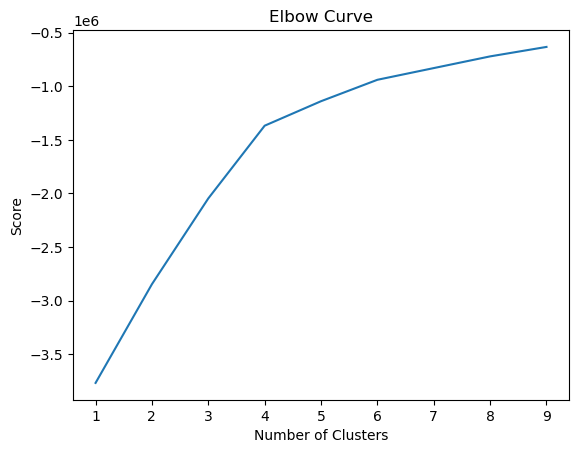

In [17]:
# Plot the elbow curve using PyLab

pl.plot(num_cl, score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

There's a large jump from 1 to 4 on the on the x-axis, but after that, the curve gets less steeper. This means that the optimal count for the clusters is 4.

<a id='Clustering'></a>
# 5. k-means clustering

In [18]:
# Create the k-means object

kmeans = KMeans(n_clusters = 4)

In [19]:
# Fit the k-means object to the data

kmeans.fit(df_transform)

C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [20]:
# Add 'clusters' column to subset dataframe

df['clusters'] = kmeans.fit_predict(df_transform)

C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Ryan\AppData\Local\Temp\ipykernel_17628\1318829010.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clusters'] = kmeans.fit_predict(df_transform)


In [21]:
# Obtain frequencies of 'clusters' column

df['clusters'].value_counts()

2    517629
1    393653
0    344143
3        67
Name: clusters, dtype: int64

<a id='scatterplots'></a>
## Scatterplots

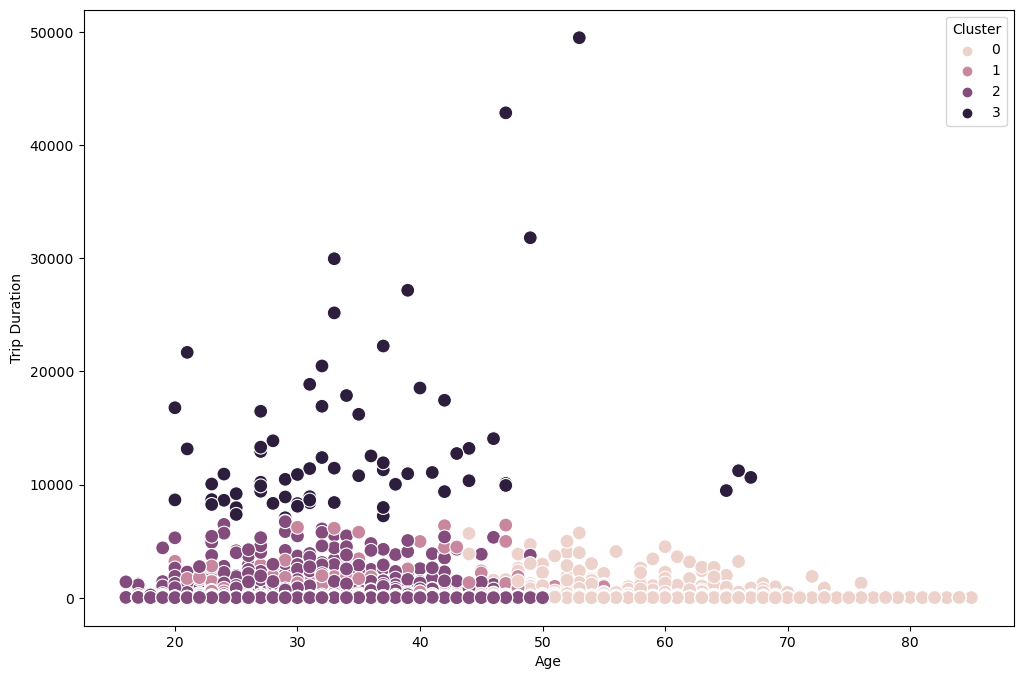

In [22]:
# Plot the clusters for the 'age' and 'trip duration' variables

plt.figure(figsize=(12,8))
scatter1 = sns.scatterplot(x=df['age'], y=df['trip_duration'], hue=kmeans.labels_, s=100)
scatter1.grid(False)
plt.xlabel('Age') 
plt.ylabel('Trip Duration')
plt.legend(title='Cluster')
plt.show()

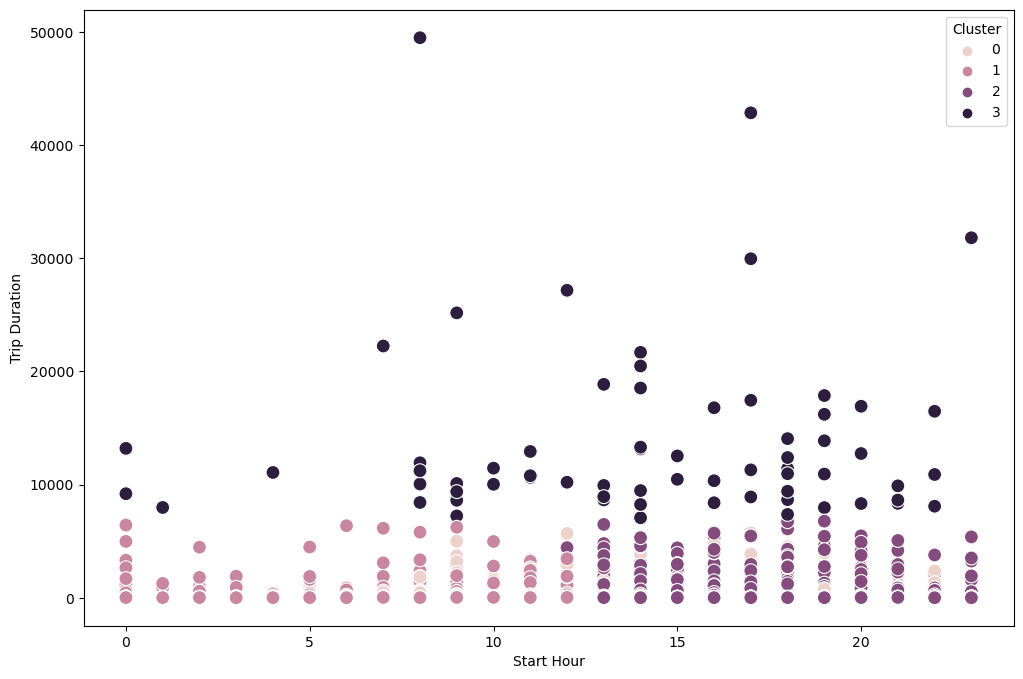

In [23]:
# Plot the clusters for the 'start hour' and 'trip duration' variables

plt.figure(figsize=(12,8))
scatter2 = sns.scatterplot(x=df['start_hour'], y=df['trip_duration'], hue=kmeans.labels_, s=100)
scatter2.grid(False)
plt.xlabel('Start Hour') 
plt.ylabel('Trip Duration')
plt.legend(title='Cluster')
plt.show()

<a id='conclusion'></a>
### Conclusion
- The light purple cluster (coded as "0" in the legend) are older Citi Bike users.
- The purple cluster (coded as "1" in the legend) are younger Citi Bike users who start trips earler in the day.
- The dark purple cluster (coded as "2" in the legend) are younger Citi Bike users who start trips later in the day.
- The black cluster (coded as "3" in the legend) are Citi Bike users who have ridiculously long trip durations.

These clusters represent the four distinct groups of Citi Bike users. The purple and dark purple clusters are likely users who commute to and from work. The black cluster is likely subscribers keeping the bike to themselves or customers on vacation needing transportation while at New York. The light purple cluster is likely users who are retired and just casually enjoying a bike ride in New York.

In [24]:
# Export scatterplot

scatter1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter1.png'), bbox_inches='tight')

In [25]:
# Export scatterplot

scatter2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter2.png'), bbox_inches='tight')

<a id='Descriptive_statistics'></a>
# 6. Descriptive statistics

In [26]:
# Obtain the mean and median values of each cluster

df.groupby('clusters').agg({'age':['mean', 'median'],
                            'trip_duration':['mean', 'median'],
                            'start_hour':['mean', 'median']})

age        trip_duration               start_hour       
               mean median          mean        median       mean median
clusters                                                                
0         55.040698   54.0     12.466641      8.800000  14.189227   15.0
1         34.493722   34.0     11.931086      8.300000   8.808565    9.0
2         31.880206   31.0     13.844330      9.050000  17.551161   17.0
3         34.417910   32.0  13693.212891  10930.919922  14.179104   14.0

<a id='conclusion2'></a>
### Conclusion
The statistics agree with my analysis from the scatterplots.
- Cluster 0 (colored as light purple) are the older Citi Bike users (mean age of 55 years).
- Cluster 1 (colored as purple) are younger Citi Bike users who are likely commuting to work (mean start hour is close to 9am).
- Cluster 2 (colored as dark purple) are younger Citi Bike users who are likely going home from work (mean start hour is close to 6pm).
- Cluster 3 (colored as black) are Citi Bike users who have ridiculously long trips (mean trip duration of 13,693 minutes).

These results could be useful for obtaining insights on the four different groups of Citi Bike users. For instance, we could further explore cluster 3 (colored as black) and uncover why these users have such ridiculously long trip durations. Is there a reason for wanting to borrow a bike for that long? Are there not enough bikes at the stations or other surrounding stations that users feel they must borrow for very long periods of time so they are guaranteed to have a bike? Are these users subscribers? Etc.

<a id='Export_data'></a>
# 7. Export data

In [27]:
# Add 'cluster' column to main dataframe

df_citibike['cluster'] = kmeans.fit_predict(df_transform)

C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [28]:
# Check the output

df_citibike.head()

,user_type,gender,age,age_group,trip_duration,start_day_name,start_day,start_hour,start_station,start_latitude,start_longitude,end_station,end_latitude,end_longitude,borough,cluster
0,Subscriber,Male,30,26-35,24.379999,Friday,1,0,Fulton St & Broadway,40.711067,-74.009445,Greenwich St & W Houston St,40.728848,-74.008591,Manhattan,0
1,Subscriber,Male,39,36-45,4.750000,Friday,1,0,E 4 St & 2 Ave,40.726280,-73.989777,E 2 St & Avenue C,40.720875,-73.980858,Manhattan,0
2,Subscriber,Male,32,26-35,11.430000,Friday,1,0,E 33 St & 5 Ave,40.747658,-73.984909,6 Ave & Spring St,40.725254,-74.004120,Manhattan,0
3,Subscriber,Female,32,26-35,7.370000,Friday,1,0,6 Ave & Spring St,40.725254,-74.004120,Bayard St & Baxter St,40.716022,-73.999741,Manhattan,0
4,Subscriber,Male,28,26-35,48.549999,Friday,1,0,W 31 St & 7 Ave,40.749157,-73.991600,W 16 St & The High Line,40.743351,-74.006821,Manhattan,0


In [29]:
# Export dataframe

df_citibike.to_csv(os.path.join(path, '02 Data','Prepared Data', '201903-citibike-tripdata-cleaned.csv'), index=False)